In [ ]:
# from google.colab import drive
import numpy as np

# makes printing more human-friendly
np.set_printoptions(precision=3,suppress=True)

In [ ]:
# Load the data
colab=True
if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    with open('/content/drive/MyDrive/Colab Notebooks/Ex_PCAdata.csv', 'r') as f:
      data = np.genfromtxt(f,delimiter=',')
else:
    with open('Ex_PCAdata.csv', 'r') as f:
        data = np.genfromtxt(f,delimiter=',')

X = data[:,:-1]
y = data[:,-1]
print('num_samples, num_features', X.shape)
print('labels', np.unique(y))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
num_samples, num_features (252, 11)
labels [4. 7.]


In [ ]:
# 2a PCA using SVD
from scipy.linalg import svd

Xcenter = X - np.mean(X, axis = 0)  # Center the data
U, S, Vt = svd(Xcenter) # Compute svd decomposition
X_pca = np.dot(Xcenter, Vt[:2, :].T)    # Compute principal components from SVD matrices

In [ ]:
# 2b PCA using sklearn
from sklearn.decomposition import PCA

Xcenter = X - np.mean(X, axis = 0)  # Center the data

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(Xcenter)   # Compute principal components

Text(0.5, 1.0, '11-D feature projected onto 2-D')

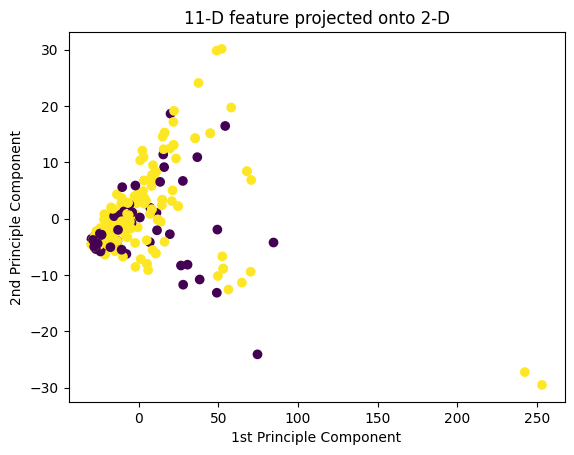

In [ ]:
# 2c Plot the principal components
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel('1st Principle Component')
plt.ylabel('2nd Principle Component')
plt.title('11-D feature projected onto 2-D')

In [ ]:
# 2d Approximation error
Xhat = pca.inverse_transform(X_pca)
error = np.linalg.norm(Xcenter - Xhat, 'fro')
print('error', error)

error 41.82030016474392


In [ ]:
if colab:
    drive.flush_and_unmount()